In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def h(x, alpha):
    return 1-x[0]**2-alpha*x[1]**2

def u_of_x(x, u_min, u_max, k=2.6, alpha=1):
    assert x.shape[0]==2, 'shape_error'
    assert u_min < u_max, f'input constraint error. {u_min} > {u_max}?'
    al = alpha
    m = 1
    l = 1
    g = 10.
    gamma = pow(10, k)
    th, thd = x
    if thd == 0:
        p = abs(m*g*np.sin(th)/2)
        ran = [u_min, -p] if th > 0 else [p, u_max]
    else:
        u_thres = np.roots([-(6*al*thd)/(m*l**2), -(2*th*thd + 3*al*g/l*thd*np.sin(th) - gamma*h(x, al))])[0]
        if thd < 0:
            u_thres = max(u_thres, u_min)
            ran = [u_thres, u_max]
        else:
            u_thres = min(u_thres, u_max)
            ran = [u_min, u_thres]
    return ran

def safe_action_existance(x, u_min, u_max, k=2.6, alpha=1):
    assert x.shape[0]==2, 'shape_error'
    assert u_min < u_max, f'input constraint error. {u_min} > {u_max}?'
    a = alpha
    m = 1
    l = 1
    g = 10.
    gamma = pow(10, k)
    th, thd = x
    u_thres = np.roots([-(6*a*thd)/(m*l**2), -(2*th*thd + 3*a*g/l*thd*np.sin(th) + gamma*(th**2+a*thd**2-1))])[0]
    if thd < 0:
        safe = 0 if u_thres > u_max else 1
    else:
        safe = 0 if u_thres < u_min else 1
    return safe

## $U(x)$が空集合とならない状態変数の領域を図示

In [3]:
region = []
for _ in range(10000):
    x = np.random.randn(2,)
    if safe_action_existance(x, -10., 10., alpha=0.4) > 0:
        region.append(x)

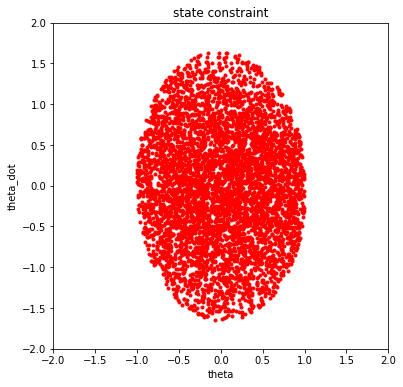

In [38]:
plt.figure(figsize=(6,6))
plt.xlabel('theta')
plt.ylabel('theta_dot')
plt.title('state constraint')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
re = np.array(region)
plt.scatter(re[:,0], re[:,1], color='red', marker='.')
plt.show()

## $h(x) \geq 0$となる領域の図示

In [48]:
# view region where h(x) >= 0
region = []
for _ in range(10000):
    x = np.random.randn(2,)
    if h(x, 0.4) >= 0:
        region.append(x)

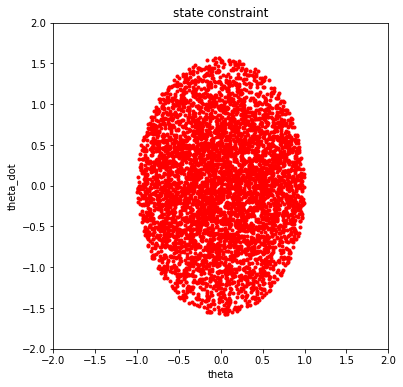

In [35]:
plt.figure(figsize=(6,6))
plt.xlabel('theta')
plt.ylabel('theta_dot')
plt.title('state constraint')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
re = np.array(region)
plt.scatter(re[:,0], re[:,1], color='red', marker='.')
plt.show()

In [57]:
print(len(region))
import csv

re = np.array(region)

with open('safe_region.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerows(re)

5511


In [21]:
# 領域CでU(x)を図示する
# フチと中身とを良い感じに見たいのでそれぞれが1:1になるように配列を作る

region = np.array(region)
h_values = []

for p in region:
    h_values.append([h(p, 0.4)])
h_values = np.array(h_values)
region_and_h = np.hstack((region, h_values))

region_and_h = region_and_h[np.argsort(region_and_h[:, 2])]

[[ 0.12415383  1.19491995  0.41345235]
 [ 0.12501766  1.60181182 -0.04194985]
 [ 0.90933506  0.35443279  0.12286071]
 ...
 [-0.55061753 -0.04075831  0.69615584]
 [ 0.60624688 -0.67276342  0.45142048]
 [-0.827301   -0.18222506  0.30229066]]
[[ 3.33190718e-01 -1.58113571e+00 -1.11012103e-01]
 [-2.87496396e-01  1.60185685e+00 -1.09032326e-01]
 [-2.60929742e-01  1.61186936e+00 -1.07333465e-01]
 ...
 [-2.76080443e-03  3.48041249e-02  9.99507847e-01]
 [-1.26300974e-02  1.67372816e-02  9.99728426e-01]
 [-7.15668697e-04  1.74815104e-02  9.99877247e-01]]


<IPython.core.display.Javascript object>


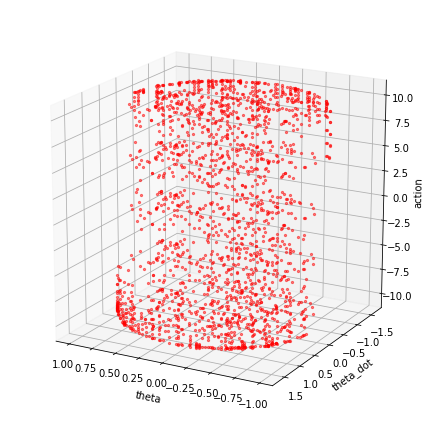

In [39]:
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D

random_index = region_and_h[np.random.randint(1000, region.shape[0], 200), 0:2]
re = np.vstack((region_and_h[0:200, 0:2],  random_index))

fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
ax.set_xlabel('theta')
ax.set_ylabel('theta_dot')
ax.set_zlabel('action')
for i, p in enumerate(re):
    ran = u_of_x(p, -10., 10., alpha=0.4)
    safe_actions = np.linspace(ran[0], ran[1], num=5)
    for a in safe_actions:
        ax.scatter3D(p[0], p[1], a, color='red', marker='.', alpha=0.5)
        
plt.show()